[![mmi-cover-image-1080x540-1.png](https://i.postimg.cc/0QpsY0dd/mmi-cover-image-1080x540-1.png)](https://postimg.cc/5YNT1vr6)

<div style="padding:20px 30px 30px; 
            color:#004346;
            font-size:50px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 
<p style="font-weight: bold; text-align: center;">Прогнозирование оттока клиентов</p>


</div>

<div style="padding:0px 40px 30px; 
            color:#004346;
            font-size:110%;
            display:fill;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:450;"> 
    
__Заказчик:__ сеть отелей «Как в гостях».
    
__Постановка проблемы:__ С целью привлечения клиентов, данная гостиничная сеть внедрила на своем веб-сайте опцию бронирования номера без предварительной оплаты. Однако, в случае отмены бронирования со стороны клиента, компания несет финансовые потери. Например, сотрудники отеля могли закупить продукты для приготовления гостевого приема, или не успеть забронировать номер для другого клиента.
    
__Цель:__ разработать систему, которая предсказывает отказ от брони.

__Оценка результата:__ Внедрение модели должно окупиться за тестовый период.
    
__Бизнес-метрика и другие данные:__
    
Основная бизнес-метрика для любой сети отелей — её прибыль. Прибыль отеля — это разница между стоимостью номера за все ночи и затраты на обслуживание: как при подготовке номера, так и при проживании постояльца. 
    
В отеле есть несколько типов номеров. В зависимости от типа номера назначается стоимость за одну ночь. Есть также затраты на уборку. Если клиент снял номер надолго, то убираются каждые два дня. 
    
Стоимость номеров отеля:
- категория A: за ночь — 1 000, разовое обслуживание — 400;
- категория B: за ночь — 800, разовое обслуживание — 350;
- категория C: за ночь — 600, разовое обслуживание — 350;
- категория D: за ночь — 550, разовое обслуживание — 150;
- категория E: за ночь — 500, разовое обслуживание — 150;
- категория F: за ночь — 450, разовое обслуживание — 150;
- категория G: за ночь — 350, разовое обслуживание — 150.    
    
В ценовой политике отеля используются сезонные коэффициенты: весной и осенью цены повышаются на 20%, летом — на 40%.

Убытки отеля в случае отмены брони номера — это стоимость одной уборки и одной ночи с учётом сезонного коэффициента.

На разработку системы прогнозирования заложен бюджет — 400 000. Затраты на разработку должны быть меньше той выручки, которую система принесёт компании.    

__Описание данных:__
    
В таблицах __hotel_train__ и __hotel_test__ содержатся одинаковые столбцы:
- `id` — номер записи;
- `adults` — количество взрослых постояльцев;
- `arrival_date_year` — год заезда;
- `arrival_date_month` — месяц заезда;
- `arrival_date_week_number` — неделя заезда;
- `arrival_date_day_of_month` — день заезда;
- `babies` — количество младенцев;
- `booking_changes` — количество изменений параметров заказа;
- `children` — количество детей от 3 до 14 лет;
- `country` — гражданство постояльца;
- `customer_type` — тип заказчика:
    - Contract — договор с юридическим лицом;
    - Group — групповой заезд;
    - Transient — не связано с договором или групповым заездом;
    - Transient-party — не связано с договором или групповым заездом, но связано с бронированием типа Transient.
- `days_in_waiting_list` — сколько дней заказ ожидал подтверждения;
- `distribution_channel` — канал дистрибуции заказа;
- `is_canceled` — отмена заказа;
- `is_repeated_guest` — признак того, что гость бронирует номер второй раз;
- `lead_time` — количество дней между датой бронирования и датой прибытия;
- `meal` — опции заказа:
    - SC — нет дополнительных опций;
    - BB — включён завтрак;
    - HB — включён завтрак и обед;
    - FB — включён завтрак, обед и ужин.
- `previous_bookings_not_canceled` — количество подтверждённых заказов у клиента;
- `previous_cancellations` — количество отменённых заказов у клиента;
- `required_car_parking_spaces` — необходимость места для автомобиля;
- `reserved_room_type` — тип забронированной комнаты;
- `stays_in_weekend_nights` — количество ночей в выходные дни;
- `stays_in_week_nights` — количество ночей в будние дни;
- `total_nights` — общее количество ночей;
- `total_of_special_requests` — количество специальных отметок.
____________________

__Целевой признак:__ `is_canceled`

</div>    

<div style="padding:0px 20px 10px; 
            color:#004346;
            font-size:15px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

# Используемые библиотеки

</div>

In [1]:
import pandas as pd
import numpy as np
import phik
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import cross_val_score, GridSearchCV

from catboost import CatBoostClassifier
from catboost import Pool
from catboost import cv
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import cross_val_score, GridSearchCV

# константы
RANDOM_SEED = 42

# настройки блокнота
pd.options.display.max_rows = 99
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.4f}'.format

<div style="padding:0px 20px 10px; 
            color:#004346;
            font-size:15px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

# Загрузка данных

</div>

In [2]:
# загрузка данных для обучения:
try:
    df = pd.read_csv('hotel_train.csv')
    display(df.head(2))
except:
    display('Данные для обучения не доступны')
# загрузка даннх для тестирования:
try:
    df_test = pd.read_csv('hotel_test.csv')
    display(df_test.head(2))
except:
    display('Данные для тестирования не доступны')

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.0000,2015,July,27,1,0,1,1.0000,...,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.0000,2015,July,27,1,0,2,2.0000,...,0,0,0,A,0,0,Transient,0,1,2


,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.0000,2017,January,1,1,1,0,2.0000,...,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.0000,2017,January,1,1,2,2,2.0000,...,0,0,0,A,0,0,Transient,0,1,4


<div style="padding:0px 20px 10px; 
            color:#004346;
            font-size:15px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

# Предобработка и исследовательский анализ данных

## Общая информация

</div>

In [3]:
display(df.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal                            

None

__Проверим признаки: `lead_time`, `adults`, `children`, `babies`, содержат ли они, дробные значения:__

In [4]:
check_columns = ['lead_time', 'adults', 'children', 'babies']

def check_int(df):
    if df[check_columns].sum()[1]==int(df[check_columns].sum()[1]):
        return 'В интересующих столбцах присутствуют только ценые числа'
    return 'В интересующих столбцах присутствуют дробные числа'
    
print(f'df: {check_int(df)}')
print(f'df_test: {check_int(df_test)}')

df: В интересующих столбцах присутствуют только ценые числа
df_test: В интересующих столбцах присутствуют только ценые числа


__Проверим пропуски в данных:__

In [5]:
def sum_passes(df):
    return sum(col_pas for col_pas in df.isna().sum())

print(f'Общее количество пропусков в данных для обучения: {sum_passes(df)}')
print(f'Общее количество пропусков в данных для тестирования: {sum_passes(df_test)}')

Общее количество пропусков в данных для обучения: 0
Общее количество пропусков в данных для тестирования: 0


__Промерим признак `id`, содержит ли он уникальные значения:__

In [6]:
def unique_values_percent(df, column):
    return len(df[column].unique())/len(df)

print(f'Уникальных значений в данных для обучения:{unique_values_percent(df, "id"):.0%}')
print(f'Уникальных значений в данных для тестирования: {unique_values_percent(df_test, "id"):.0%}')

Уникальных значений в данных для обучения:100%
Уникальных значений в данных для тестирования: 100%


<div style="padding: 30px 25px; border: 2px #6495ed solid">

__Вывод:__

- Данные загружены корректно
- Регист названий стобцов соблюден
- Пропуски отсутствуют
    
__Недостатки:__
- некоректный тип данных в столбцах:
    - `lead_time`: 'float64', следует заменить нам 'int64'
    - `adults`: 'float64',  следует заменить нам 'int64'
    - `children`: 'float64', следует заменить нам 'int64'
    - `babies`: 'float64', следует заменить нам 'int64'

    Что может помочь избежать ошибок при работе с этими данными, таких как округление или потеря точности. Приведение к целочисленному типу также может уменьшить объем занимаемой памяти.
- Данный датафрейм имеет столбец `id`, который является уникальным идентификатором для каждого наблюдения. В связи с тем, что этот признак не предоставляет никакой полезной информации для обучения модели, рекомендуется удалить его из датафрейма.
    
</div>


### Изменение типов данных


In [7]:
df[check_columns ] = df[check_columns ].astype('int')
df_test[check_columns ] = df_test[check_columns ].astype('int')


### Удаление признаков с уникальными значениями
    

In [8]:
df = df.drop('id', axis=1).copy()
df_test = df_test.drop('id', axis=1).copy()

<div style="padding:0px 20px 10px; 
            color:#004346;
            font-size:15px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

## Дубликаты
    
</div>

__Проверим количество полных дубликатов в данных:__

In [9]:
def duplicat_data(df):
    return df.duplicated().sum()

print(f'Количество дубликатов в данных для обучения:{duplicat_data(df)}')
print(f'Количество дубликатов в данных для тестирования: {duplicat_data(df_test)}')

Количество дубликатов в данных для обучения:21377
Количество дубликатов в данных для тестирования: 7717


- Наличие дублирующихся наблюдений может привести к переобучению модели, когда она начинает настраиваться на шумовые данные, вместо того, чтобы находить общие закономерности в данных.
- Если дублирующиеся наблюдения содержат ошибки или неточности, удаление их может привести к улучшению качества модели.
- Но так как мы не можем определить природу возникновения дубликатов, удалить их следует только в тренировочном наборе данных

__Удалим дубликаты в данных:__


In [10]:
df = df.drop_duplicates()

<div style="padding:0px 20px 10px; 
            color:#004346;
            font-size:15px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

## Анализ категориальные признаков
    
</div>

In [11]:
# общая информация 
display(df.describe(include=[object]))
display(df_test.describe(include=[object]))

,arrival_date_month,meal,country,distribution_channel,reserved_room_type,customer_type
count,43852,43852,43852,43852,43852,43852
unique,12,5,155,4,7,4
top,October,BB,PRT,TA/TO,A,Transient
freq,5514,35552,14467,35185,30445,35369


,arrival_date_month,meal,country,distribution_channel,reserved_room_type,customer_type
count,32412,32412,32412,32412,32412,32412
unique,8,5,143,4,7,4
top,May,BB,PRT,TA/TO,A,Transient
freq,5262,24684,9887,27083,23471,27461


__Посмотрим уникальные значения в категориальных признаках:__

In [12]:
def unique_values(column):
    print(f'Уникальные значения признака {column} в данных для обучения:\n{df[column].unique()}')
    print(f'\nУникальные значения признака {column} в данных для тестирования:\n{df[column].unique()}')

In [13]:
unique_values('arrival_date_month')

Уникальные значения признака arrival_date_month в данных для обучения:
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

Уникальные значения признака arrival_date_month в данных для тестирования:
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']


In [14]:
unique_values('meal')

Уникальные значения признака meal в данных для обучения:
['BB       ' 'FB       ' 'HB       ' 'SC       ' 'SC']

Уникальные значения признака meal в данных для тестирования:
['BB       ' 'FB       ' 'HB       ' 'SC       ' 'SC']


In [15]:
unique_values('country')

Уникальные значения признака country в данных для обучения:
['GBR' 'PRT' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'USA' 'DEU' 'BEL' 'CHE' 'CN'
 'GRC' 'NLD' 'ARG' 'RUS' 'SWE' 'POL' 'EST' 'CZE' 'ITA' 'FIN' 'DNK' 'MOZ'
 'BWA' 'LUX' 'BRA' 'SVN' 'ALB' 'CHN' 'MEX' 'MAR' 'SMR' 'LVA' 'CHL' 'AUT'
 'LTU' 'TUR' 'ISR' 'IND' 'CYM' 'AUS' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN'
 'TUN' 'ARE' 'HRV' 'HKG' 'IRN' 'GIB' 'JEY' 'URY' 'ZAF' 'COL' 'GGY' 'KWT'
 'CYP' 'KAZ' 'THA' 'DOM' 'NGA' 'BLR' 'VEN' 'UKR' 'ARM' 'JPN' 'LKA' 'MYS'
 'BIH' 'MUS' 'OMN' 'SUR' 'JAM' 'BGR' 'CIV' 'SRB' 'JOR' 'SYR' 'PHL' 'PRI'
 'SGP' 'BDI' 'LBN' 'AGO' 'VNM' 'AZE' 'PLW' 'NZL' 'EGY' 'MDV' 'CMR' 'MLT'
 'SVK' 'MWI' 'STP' 'TWN' 'IDN' 'SEN' 'PER' 'SAU' 'KNA' 'ETH' 'ECU' 'IRQ'
 'AND' 'HND' 'PAK' 'GEO' 'ZMB' 'QAT' 'KHM' 'MCO' 'BGD' 'ISL' 'UZB' 'IMN'
 'TJK' 'NIC' 'BEN' 'MAC' 'VGB' 'TZA' 'GAB' 'MKD' 'TMP' 'GLP' 'KEN' 'LIE'
 'MMR' 'PAN' 'BFA' 'LBY' 'GNB' 'MLI' 'BHR' 'NAM' 'BOL' 'SYC' 'PRY' 'BRB'
 'ABW' 'SLV' 'DMA' 'CUB' 'PYF' 'UGA' 'GUY' 'LCA' 'ATA' 'RWA' 'MNE

In [16]:
unique_values('distribution_channel')

Уникальные значения признака distribution_channel в данных для обучения:
['Direct' 'TA/TO' 'Corporate' 'GDS']

Уникальные значения признака distribution_channel в данных для тестирования:
['Direct' 'TA/TO' 'Corporate' 'GDS']


In [17]:
unique_values('reserved_room_type')

Уникальные значения признака reserved_room_type в данных для обучения:
['A               ' 'C               ' 'D               '
 'E               ' 'G               ' 'F               '
 'B               ']

Уникальные значения признака reserved_room_type в данных для тестирования:
['A               ' 'C               ' 'D               '
 'E               ' 'G               ' 'F               '
 'B               ']


In [18]:
unique_values('customer_type')

Уникальные значения признака customer_type в данных для обучения:
['Transient' 'Contract' 'Transient-Party' 'Group']

Уникальные значения признака customer_type в данных для тестирования:
['Transient' 'Contract' 'Transient-Party' 'Group']


<div style="padding: 30px 25px; border: 2px #6495ed solid">
    
__Недостатки и особенности:__
- В столбце arrival_date_month — месяц заезда:
    - следует обратить внимание на то, что в наборе данных за тестовый период предоставлены данные только за 8 месяцев, это следует учесть при ценки прибыли, которую принесёт модель за год.
- В столбцах meal — опции заказа и reserved_room_type  — тип забронированной комнаты:
    - присутствуют пробелы, их следует удалить
- В столбце country — гражданство постояльца:
    - слишким большое количество категорий, что приведет к низкому количеству записей по каждой категории, что снизит качество моделей, это следует обработать
</div>

<div style="padding:0px 20px 10px; 
            color:#004346;
            font-size:15px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

### Обработка категориальные признаков
    
</div>

__Удалим пробелы в начале и конце заначений столбцов `meal` и `reserved_room_type`__

In [19]:
for d in [df, df_test]:
    for _ in ['meal', 'reserved_room_type']:
        d[_] = d[_].str.strip()

unique_values('meal')
unique_values('reserved_room_type')

Уникальные значения признака meal в данных для обучения:
['BB' 'FB' 'HB' 'SC']

Уникальные значения признака meal в данных для тестирования:
['BB' 'FB' 'HB' 'SC']
Уникальные значения признака reserved_room_type в данных для обучения:
['A' 'C' 'D' 'E' 'G' 'F' 'B']

Уникальные значения признака reserved_room_type в данных для тестирования:
['A' 'C' 'D' 'E' 'G' 'F' 'B']


__Обработка столбца `country`__

В столбце с гражданством постояльцев много уникальных значений(155 в обучающей и 143 в тестовой выборках)

Посмотрим на количество записей, в уникальных категориях

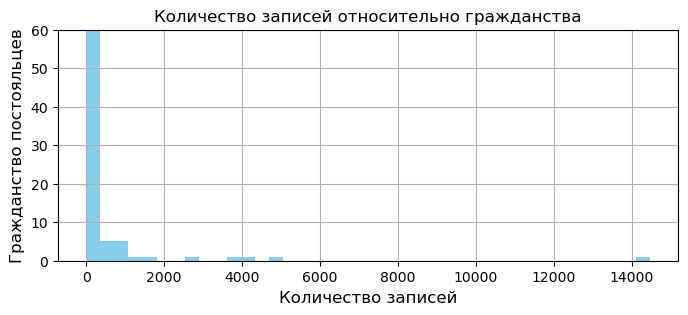

In [20]:
plt.figure(figsize=(8,3))
plt.hist(df.groupby('country')['is_canceled'].count(), bins=40, color='skyblue')
plt.grid(True)
plt.title('Количество записей относительно гражданства')
plt.xlabel('Количество записей', fontsize=12)
plt.ylabel('Гражданство постояльцев', fontsize=12)
plt.ylim([0, 60])

plt.show()

Большинство категорий содержит крайне мало записей, их использование в алгоритмах машинного обучения повлечет к снижению точности:
- рассчитаем количество записей, который можно считать репризинтативным, на обучающей выборки
- все категории, меньше данного порога объединим в одну категорию ('rest')
- для тестовой выборки так же объединим категории, не входящие в список категорий, обучающей выборки

Для расчета исполюзуем [калькулятор](https://www.questionstar.ru/statiy/calculator-razmera-viborki) со следующими параметрами:
- Допустимая погрешность: 5%
- Уровень надежности: 95%
- Размер генеральной совокупности: 65229 (len(df))
- Доля признака в генеральной совокупности: [37%](#Баланс-целевого-признака)

Резутьтат:
- Необходимый минимальный размер выборки: 357

357 записей - минимальное количество записей для категории, которую мы оставим.

In [21]:
# перечень значений, с репризинтативным количеством записей 
idx = df.groupby('country')['is_canceled'].count().loc[lambda x: x>=357].index

In [22]:
# функция замены нерепризинтативных записей
def reprising_quantity(entry):
    return entry if entry in idx else 'rest'

In [23]:
df['country'] = df['country'].apply(reprising_quantity)
df_test['country'] = df_test['country'].apply(reprising_quantity)

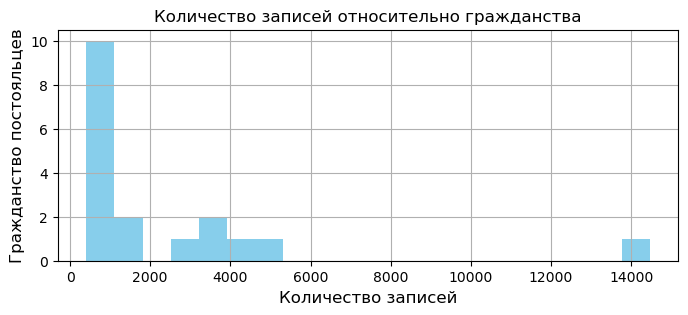

In [24]:
# визуализация изменений
plt.figure(figsize=(8,3))
plt.hist(df.groupby('country')['is_canceled'].count(), bins=20, color='skyblue')
plt.grid(True)
plt.title('Количество записей относительно гражданства')
plt.xlabel('Количество записей', fontsize=12)
plt.ylabel('Гражданство постояльцев', fontsize=12)

plt.show()

<div style="padding: 30px 25px; border: 2px #6495ed solid">

__Вывод:__

- Столбцы `meal`, `reserved_room_type`, `country` обработаны;
- Остальные категориальные характеристики не требуют дополнительной обработки.   
    
</div>

<div style="padding:0px 20px 10px; 
            color:#004346;
            font-size:15px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

## Анализ числовых признаков
    
</div>

In [25]:
# общая информация
df.describe().T[['mean', '50%', 'min', 'max']]

,mean,50%,min,max
is_canceled,0.2542,0.0000,0.0000,1.0000
lead_time,67.8938,41.0000,0.0000,374.0000
arrival_date_year,2015.7755,2016.0000,2015.0000,2016.0000
arrival_date_week_number,31.0912,33.0000,1.0000,53.0000
arrival_date_day_of_month,15.9193,16.0000,1.0000,31.0000
stays_in_weekend_nights,0.8960,1.0000,0.0000,4.0000
stays_in_week_nights,2.3121,2.0000,0.0000,6.0000
adults,1.8563,2.0000,0.0000,4.0000
children,0.1076,0.0000,0.0000,3.0000
babies,0.0107,0.0000,0.0000,10.0000


<div style="padding: 30px 25px; border: 2px #6495ed solid">
    
__Недостатки и особенности:__
- В следующих столбцах присутствуют аномально большие значения:
    - `lead_time` — количество дней между датой бронирования и датой прибытия 
    - `babies` — количество младенцев
    - `previous_cancellations` — количество отменённых заказов у клиента
    - `previous_bookings_not_canceled` — количество подтверждённых заказов у клиента
    - `booking_changes` — количество изменений параметров заказа
    - `days_in_waiting_list` — сколько дней заказ ожидал подтверждения
    
Следует более тчательно посмотреть информацию в данных столбцах, в случае наличая аномально больших значений, их следует удалить, по причине того, что большинство моделей машинного обучения чувствительны к выбросам.    

</div>

<div style="padding:0px 20px 10px; 
            color:#004346;
            font-size:15px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

### Обработка числовых признаков
    
</div>

#### __`lead_time`__

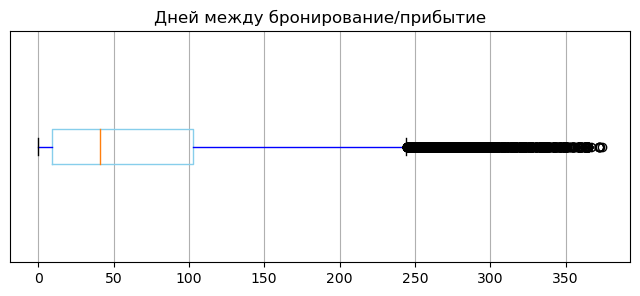

In [26]:
# блочная диаграмма до обработки аномалий
plt.figure(figsize=(8,3))
plt.boxplot(df['lead_time'], vert=False, boxprops=dict(color='skyblue'), whiskerprops=dict(color='blue'))
plt.grid(True)
plt.title('Дней между бронирование/прибытие')
plt.yticks([])
plt.show()

__Удалим аномалии__
$$
Аномалии = Наблюдения > Q3 + 1,5*IQR
$$
где:
- Q3: 75-й процентиль
- IQR: Межквартильный размах (разница между 75-м процентилем (q3) и 25-м процентилем (q1) в наборе данных)

In [27]:
q1 = df['lead_time'].quantile(0.25)
q3 = df['lead_time'].quantile(0.75)
print(f'Порог аномальных значений: {int(q3+1.5*(q3-q1))} дней')

Порог аномальных значений: 244 дней


In [28]:
df = df[df['lead_time']<(q3+1.5*(q3-q1))]

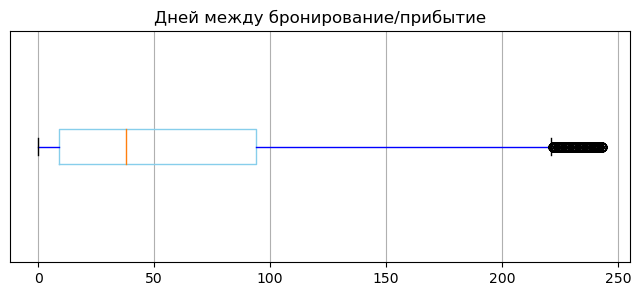

In [29]:
# блочная диаграмма после обработки аномалий
plt.figure(figsize=(8,3))
plt.boxplot(df['lead_time'], vert=False, boxprops=dict(color='skyblue'), whiskerprops=dict(color='blue'))
plt.grid(True)
plt.title('Дней между бронирование/прибытие')
plt.yticks([])
plt.show()


#### __`babies`__

In [39]:
# визуализация количества младенцев
plt.figure(figsize=(8,3))
plt.hist(df['babies'], bins=20, color='skyblue')
plt.grid(True)
plt.title('Количество записей относительно количеству младенцев')
plt.xlabel('Количество младенцев', fontsize=12)
plt.ylabel('количество записей', fontsize=12)
plt.ylim([0, 10000])
plt.show()

KeyError: 'babies'

<Figure size 800x300 with 0 Axes>

Нам не подойдет удаление аномалий через межквартильный размах, так как большинство данных сосредоточено в значении 0, обработаем вручную и  посмотрим записи где младенцев было больше 1-го

In [31]:
# функция принимает на вход целевой признак и порог
# возвращает долю среза данных по заданному порогу
def cut_fraction(feature, threshold):
    print(f"{len(df[df[feature]>threshold])/len(df) :.4%}:\
 доля записей признака {feature} со значением большим {threshold} в наборе данных для тестирования")

    print(f"{len(df_test[df_test[feature]>threshold])/len(df_test) :.4%}:\
 доля записей признака {feature} со значением большим {threshold} в наборе данных для тестирования")


In [32]:
cut_fraction('babies', 1)

0.0118%: доля записей признака babies со значением большим 1 в наборе данных для тестирования
0.0123%: доля записей признака babies со значением большим 1 в наборе данных для тестирования


Из обзора данных можно заметить, что количество бронирований с двумя или более младенцами является недостаточным для проведения точного прогнозирования. Поэтому, чтобы правильно обработать такие строки, рекомендуется изменить признак на бинарный, где значение 1 будет означать наличие младенцев, а значение 0 - их отсутствие. Таким образом, признак может быть переименован в `has_babies`, чтобы отразить его новую бинарную природу.

In [33]:
# создание бинарного признака наличия детей:
df['has_babies'] = (df['babies']>0)*1
df_test['has_babies'] = (df_test['babies']>0)*1
# удаление вспомогательного признака
df = df.drop('babies', axis=1).copy()
df_test = df_test.drop('babies', axis=1).copy()

#### __`previous_cancellations`__

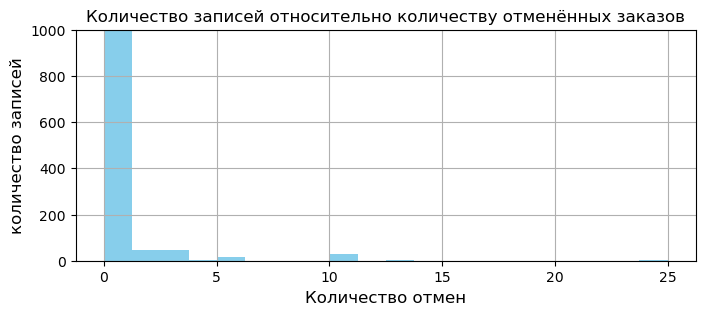

In [34]:
# визуализация количества младенцев
plt.figure(figsize=(8,3))
plt.hist(df['previous_cancellations'], bins=20, color='skyblue')
plt.grid(True)
plt.title('Количество записей относительно количеству отменённых заказов')
plt.xlabel('Количество отмен', fontsize=12)
plt.ylabel('количество записей', fontsize=12)
plt.ylim([0, 1000])
plt.show()

In [35]:
cut_fraction('previous_cancellations', 0)

2.2114%: доля записей признака previous_cancellations со значением большим 0 в наборе данных для тестирования
0.6973%: доля записей признака previous_cancellations со значением большим 0 в наборе данных для тестирования


Просмотр данных показывает, что количество записей с отмененными заказами слишком мало для точного прогнозирования. Для того чтобы правильно обработать такие записи, рекомендуется изменить признак на бинарный. В этом случае, значение 1 будет означать наличие отмены заказа, а значение 0 - отсутствие отмены заказа. Таким образом, признак может быть переименован в `has_cancellations`, чтобы отразить бинарную природу этого признака.

In [36]:
# создание бинарного признака наличия детей:
df['has_cancellations'] = (df['previous_cancellations']>0)*1
df_test['has_cancellations'] = (df_test['previous_cancellations']>0)*1
# удаление вспомогательного признака
df = df.drop('previous_cancellations', axis=1).copy()
df_test = df_test.drop('previous_cancellations', axis=1).copy()

#### __`previous_bookings_not_canceled`__

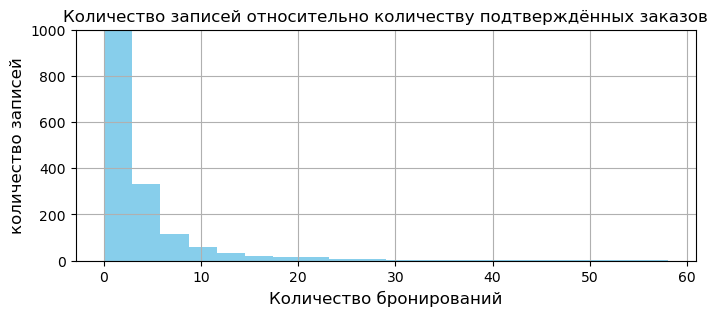

In [37]:
# визуализация количества подтверждённых заказов
plt.figure(figsize=(8,3))
plt.hist(df['previous_bookings_not_canceled'], bins=20, color='skyblue')
plt.grid(True)
plt.title('Количество записей относительно количеству подтверждённых заказов')
plt.xlabel('Количество бронирований', fontsize=12)
plt.ylabel('количество записей', fontsize=12)
plt.ylim([0, 1000])
plt.show()

In [38]:
cut_fraction('previous_cancellations', 25)

KeyError: 'previous_cancellations'

Более 30 подтверждённых заказов у клиента единичны, для улучшения качества обучения модели удаляем их.

In [ ]:
df = df[df['previous_bookings_not_canceled']<=25]

#### __`booking_changes` — количество изменений параметров заказа__

In [ ]:
# визуализация количества изменений параметров заказа
plt.figure(figsize=(8,3))
plt.hist(df['booking_changes'], bins=15, color='skyblue')
plt.grid(True)
plt.title('Количество записей относительно количеству изменений в заказе')
plt.xlabel('Количество изменений в заказе', fontsize=12)
plt.ylabel('Количество записей', fontsize=12)
plt.ylim([0, 10000])
plt.show()

In [ ]:
cut_fraction('previous_cancellations', 5)

Более 5 пизменений параметров заказа у клиента крайне редки, для улучшения качества обучения модели удаляем их.

In [ ]:
df = df[df['booking_changes']<=5]

#### __`days_in_waiting_list ` — сколько дней заказ ожидал подтверждения__

In [ ]:
# визуализация количества дней до подтверждения
plt.figure(figsize=(8,3))
plt.hist(df['days_in_waiting_list'], bins=25, color='skyblue')
plt.grid(True)
plt.title('Количество записей относительно количеству дней до подтверждения')
plt.xlabel('Количество дней до подтверждения', fontsize=12)
plt.ylabel('Количество записей', fontsize=12)
plt.ylim([0, 1000])
plt.show()

In [ ]:
cut_fraction('previous_cancellations', 100)

Действительно, количество дней которые заказ ожидал подтверждения у клиента большее 100 редки, удалим их

In [ ]:
df = df[df['previous_cancellations']<=100]

#### __`required_car_parking_spaces` — необходимость места для автомобиля__

Максимальное количество запрашиваемых парковочных мест -3 места, проверим количество записей, в которых люди бронировали более одного парковочного места

In [ ]:
cut_fraction('required_car_parking_spaces', 1)


Как видно, таких записей крайне мало. Для того чтобы правильно обработать такие записи, рекомендуется изменить признак на бинарный. В этом случае, значение 1 будет означать необходимость парковочных мест, а значение 0 - отсутствие резервирования парковки.

In [ ]:
# создание бинарного признака необходимости места для автомобиля:
df['required_car_parking_spaces'] = (df['required_car_parking_spaces']>0)*1
df_test['required_car_parking_spaces'] = (df_test['required_car_parking_spaces']>0)*1

#### __Проверка других аномалий__

Проверим, сдочу номеров без взрослых клиентов

In [ ]:
cut_fraction('adults', 0)

0.3 - 0.4% записей номера были предоставлены без взрослых, что является очевидной ошибкой в данных. Удалин данные записи.

In [ ]:
df = df[df['adults']>0]

<div style="padding: 30px 25px; border: 2px #6495ed solid">

__Вывод:__

- Числовые столбцы обработаны
- Аномалии удалены  
    
</div>

#### Баланс целевого признака

Посмотрим распределение целевого признака: is_canceled — отмена заказа


In [ ]:
data = [df['is_canceled'].value_counts()[0], df['is_canceled'].value_counts()[1]]
labels = ['0', '1']

colors = sns.color_palette('pastel')[ 0:5 ]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [ ]:
data = [df2['is_canceled'].value_counts()[0], df2['is_canceled'].value_counts()[1]]
labels = ['0', '1']

colors = sns.color_palette('pastel')[ 0:5 ]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

<div style="padding: 30px 25px; border: 2px #6495ed solid">

__Вывод:__

- Присутствует дисбаланс целевого признака
- При обучении моделей, чувствительных к дисдалансу, необходимо использовать параметр class_weight='balanced', для решения данной проблемы.    

</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: молодец, что изучаешь соотношение классов!</div>

#### Кореляция признаков

Посмотрим какие признаки имеют наибольшее влияние на целевой

In [ ]:
phik_overview = df.phik_matrix()
cor = phik_overview['is_canceled'].sort_values(ascending=False)
cor

In [ ]:
phik_overview = df2.phik_matrix()
cor2 = phik_overview['is_canceled'].sort_values(ascending=False)
cor2

<div style="padding: 30px 25px; border: 2px #6495ed solid">

__Вывод:__

- Как ни странно id - номер записи оказывает наибольшее влияние на целевой признак, возможно при формировании донной записи используется дополнительные характеристики, что влечет кореляцию с целевым признаком.
- Так же высокой кореляцию с целевым признаком обладают следующие столбцы:
    - country                          0.4379
    - lead_time                        0.4202
    - total_of_special_requests        0.4061    
</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: вообще какая-либо зависимость от id говорит о вероятной аномалии: например, о массовой отмене бронирований в некий промежуток времени, из-за чего в каком-то диапазоне id будет находиться большое количество такий бронирований. Но при использовании ML в реальных задачах мы подразумеваем, что модель будет делать корректные предсказания вне зависимости от аномалий. К тому же стоит проверить, все ли значения id уникальны, так как в таком случае корреляция будет не показательна. А тогда такой признак может запутать модель и заставить ее выучить несуществующие зависимости, поэтому id правильнее будет удалить</div>

<div class="alert alert-info">
я удаляю в одной из выборок, посмотрим к чему это приведет, баланс в данных уже ухудшился)))
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

### Формулировка ML-задачи на основе бизнес-задачи

Основная бизнес-метрика для любой сети отелей — её прибыль.

Прибыль отеля — это разница между стоимостью номера за все ночи и затраты на обслуживание: как при подготовке номера, так и при проживании постояльца. 

В отеле есть несколько типов номеров. В зависимости от типа номера назначается стоимость за одну ночь. Есть также затраты на уборку. Если клиент снял номер надолго, то убираются каждые два дня. 

In [ ]:
# датафрейм типов номеров с ценами и затратами на уборку
df_info=pd.DataFrame({'reserved_room_type': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
                      'price_night':[1000, 800, 600, 550, 500, 450, 350],
                      'service':[400, 350, 350, 150, 150, 150, 150]})
df_info

Создадим отдельный датасет на основе тестового, для расчета приприбыли

In [ ]:
# добавим к тестовому датасету информацию о ценах за номер и затраты на уборку
df_test_info = df_test.merge(df_info, on='reserved_room_type', how='left').copy()
df = df.merge(df_info, on='reserved_room_type', how='left').copy()
df2 = df2.merge(df_info, on='reserved_room_type', how='left').copy()

In [ ]:
# функция для добавления сезонного коофициента, на основе данных о месяце
k1 = ['September', 'October', 'November', 'March', 'April', 'May']
k2 = ['July', 'August', 'June']

def coefficient(month):
    if month in k1:
        return 1.2
    elif month in k2:
        return 1.4
    return 1
# добывим сезонный коофициент
df_test_info['coefficient'] = df_test_info['arrival_date_month'].apply(coefficient)
df['coefficient'] = df['arrival_date_month'].apply(coefficient)
df2['coefficient'] = df2['arrival_date_month'].apply(coefficient)

In [ ]:
# оставим столбцы, необходимые для расчета прибыли
df_test_info = df_test_info[['total_nights', 'is_canceled', 'price_night', 'service', 'coefficient']].copy()

__Оценим прибыль отеля без внедрения депозитов за тестовый период__

In [ ]:
# функция расчета прибыли бе дипозита

def profit(x):
    if x['is_canceled']:
        # убытки отеля в случае отмены брони номера
        return (x['price_night']*x['coefficient']+x['service'])*(-1)
    elif x['total_nights'] == 1:
        # прибыль отеля в случае бронирования номера на одну ночь
        return x['price_night']*x['coefficient'] - x['service']
    # прибыль отеля в случае бронирования номера на несколько ночей(уборка раз в 2 дня)
    return x['price_night']*x['coefficient']*x['total_nights'] - x['service']*(x['total_nights']//2 +1)


In [ ]:
df_test_info['profit'] = df_test_info.apply(profit, axis=1)
df['profit'] = df.apply(profit, axis=1)
df2['profit'] = df2.apply(profit, axis=1)
df_test_info.head(2)

In [ ]:
# рассчитаем прибыль отеля без внедрения депозитов за тестовый период до внедррения модели
display(df_test_info['profit'].sum())

__Оценим прибыль отеля без внедрения депозитов за обучающий период__

In [ ]:
# рассчитаем прибыль отеля без внедрения депозитов за обучающий период до внедррения модели
profit_no_model_df = df['profit'].sum()
display(profit_no_model_df)

profit_no_model_df2 = df2['profit'].sum()
display(profit_no_model_df2)

<div style="padding: 30px 25px; border: 2px #6495ed solid">

__Вывод:__

- прибыль отеля без внедрения депозитов за тестовый период составила: 32582920

</div>

#### Функция для расчета увеличения прибыли после внесения 

Позволит определить увеличение прибыли в процентах

In [ ]:
cv_profit = KFold(n_splits=4, random_state=RS, shuffle=True)

In [ ]:
def mod(x):
    if x['predict']==1 and x['is_canceled']==1:
        # убытки отеля в случае отмены брони номера и верного предсказания модоли
        return (x['price_night']*x['coefficient']+x['service'])*(-0.2)
    elif x['predict']==0 and x['is_canceled']==1:
        # убытки отеля в случае отмены брони номера и неверного предсказания модоли
        return (x['price_night']*x['coefficient']+x['service'])*(-1)
    elif x['total_nights'] == 1:
        # прибыль отеля в случае бронирования номера на одну ночь
        return x['price_night']*x['coefficient'] - x['service']
    # прибыль отеля в случае бронирования номера на несколько ночей(уборка раз в 2 дня)
    return x['price_night']*x['coefficient']*x['total_nights'] - x['service']*(x['total_nights']//2 +1)

In [ ]:
def profit_model(features, target, model, df):
    profits = []
    for train_fold_index, val_fold_index in cv_profit.split(features):
        features_train_fold, target_train_fold = features.iloc[train_fold_index], target.iloc[train_fold_index]
        features_val_fold, target_val_fold = features.iloc[val_fold_index], target.iloc[val_fold_index]
        
        model.fit(features_train_fold, target_train_fold)
        predict = model.predict(features_val_fold)
        
        info = df.iloc[val_fold_index]
        
        info['predict'] = predict
        
        info['profit_model'] = info.apply(mod, axis=1)
        profit = sum(info['profit_model'])
        profits.append(profit)
        
    return (sum(profits)-df['profit'].sum())/ df['profit'].sum()  

### Разработка модели ML

В данном анализе целевым признаком являемся факт отказа от брони, что является задачей классификации.

Проведем сравнительный анализ нескольких алгоритмов машинного обучения:
- Логическая регрессия
- Случайный лес
- СatBoost

Метрикой качества будет выступать AUC
Дополнительной - прогноз увеличения прибыли

По скольку, данная метрика, является числовой интерпритацией оценок:
- TPR полностью совпадает с полнотой, и показывает долю верно предсказанных классов у объектов, относящихся к положительному классу
- FPR — это доля неправильно предсказанных классов среди объектов отрицательного класса.

Что позволит оченить качество предсказаний на разных уровнях принятия решения о присвоении положительного класска(клиентов которые откажутся от брони)

Основная бизнес-метрика для любой сети отелей — её прибыль, рассчитаем прогноз увеличения прибыли

<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: в этом проекте важно аргументировать выбор метрики, исходя из бизнес-задачи. Если ты считаешь, что именно AUC-ROC позволит максимизировать прибыль(путем минимизации убытков), то нужно это пояснить</div>

<div class="alert alert-info">
Если я не правильно понял данную ошибку, просьба описать подробнее, что имеется ввиду в задании
</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: окей, принимается, но давай попробуем разобраться подробнее: при разработке модели для бизнеса выбор метрики(и в учебных, и в реальных проектах) всегда зависит от бизнес-задачи, которую эта модель будет решать. В этом проекте бизнес-задача — это минимизация убытков от отмен бронирования путем введения депозитов. Запомнив это, давай попробуем разобраться со всеми основными метриками:
    
- **accuracy** — основная проблема этой метрики — это несбалансированные выборки. При дисбалансе классов(особенно, если дисбаланс существенный), accuracy не показательна, так как результат может быть искажен из-за того, что модель лучше предсказывает бОльший класс. Так как на практике редко бывают сбалансированные классы(как и в этом случае), то и accuracy используется не так часто;
- метрика **precision** показывает, какая доля объектов, которую модель определила как положительные, действительно положительные. То есть, максимизируя метрику precision, мы пытаемся минимизировать количество **ложноположительных** ответов: клиентов, которые не собирались отменять бронирование, а модель решила, что они все-таки отменят.
- метрика **recall** — это доля положительных объектов, которую нашла модель, из всех положительных объектов. Максимизируя recall мы хотим минимизировать количество **ложноотрицательных** ответов модели: клиентов, которые отменят бронирование, но модель решила, что они заселятся.
- **F1-мера** — это среднее гармоническое precision и recall, она обычно используется в тех случаях, когда нам одинаково важны и precision, и recall
- **AUC-ROC** показывает общее качество бинарного классификатора, в качестве основной метрики для бизнес-задачи она не всегда подходит, так как ее довольно сложно интерпретировать
    
Теперь можно вернуться к бизнес-задаче. Как мы знаем, отель несет убытки только в случае отмены бронирования(то есть положительных объектов), значит, нам важно найти максимальное количество таких объектов. Тогда для нас важнее всего минимизировать количество ложноотрицательных ответов, чтобы отель мог взять депозит с наибольшего количества «отменяльщиков».
    
Ложноположительные ответы не так критичны, так как депозит просто пойдет в стоимость оплаты. Но тут может возникнуть другая проблема: «надежные» клиенты могут отменять бронирование, тогда стоит попробовать компенсировать это не метрикой, а как раз худшим сценарием, который ты проверяешь ниже

А вообще можно пойти еще дальше: раз основная задача модели — это максимизация прибыли, то почему бы не использовать прибыль в качестве метрики :) Но тогда ее нужно сделать метрикой, для этого можно создать свой scorer с помощью <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html" target="blank_">make_scorer</a> и передавать его GridSearch. Использование кастомных метрик выходит за рамки курса, поэтому это не обязательно, но если интересно, то можешь попробовать реализовать самостоятельно, будет здорово :)</div>

#### Подготовка данных

Для модели СatBoost не требуется масштабирование числовых признаков, и  прямого кодирования категориальных, так так имеет встреенные, более совершенные методы. Для данной модели сохраним текущии выборки

In [ ]:
# сохраним выборки для обучение модели СatBoost
df_cb = df.copy()
df_cb2 = df2.copy()
df_test_cb = df_test.copy()

Некоторые числовые признаки не будут использоваться в обучении моделей:
- arrival_date_year — год заезда. в обычаюших и тестовых выборках сведенья за разные годы, по этой причине данная метрика не информативна
- arrival_date_week_number — неделя заезда. Дублируется arrival_date_month, но создает больше категорий с меньшим количеством записей в каждом
- total_nights — общее количество ночей. Дублируется двумя другими столбцами stays_in_weekend_nights и stays_in_week_nights, которые дают больше информации

Проверим соответствует ли общее количество ночей, сумме stays_in_weekend_nights и stays_in_week_nights

In [ ]:
sum(df['stays_in_weekend_nights']+df['stays_in_week_nights'] != df['total_nights'])

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: согласен, эти признаки вряд ли пригодятся перед обучении моделей</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: судя по описанию, `total_nights` — это действительно сумма `stays_in_week_nights` и `stays_in_weekend_nights`, но перед удалением `total_nights` тогда стоит проверить, выполняется ли условие для всех бронирований</div>

<div class="alert alert-info">
Согласен, проверил.
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

##### Подготовка числовых и категориальных признаков

In [ ]:
# категориальные признаки
categorical_columns = ['arrival_date_month', 'meal', 'distribution_channel', 'is_repeated_guest', 
                      'customer_type', 'reserved_room_type', 'country', 'has_babies']
# числовые признаки
numeric_columns = ['id', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
                  'previous_cancellations', 'previous_bookings_not_canceled', 
                  'booking_changes', 'days_in_waiting_list' ]

numeric_columns2 = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
                  'previous_cancellations', 'previous_bookings_not_canceled', 
                  'booking_changes', 'days_in_waiting_list' ]
# целевой признак
y = ['is_canceled']
# выборки
features_train = df[categorical_columns+numeric_columns]
features_train2 = df2[categorical_columns+numeric_columns2]
target_train = df[y]
target_train2 = df2[y]
features_test = df_test[categorical_columns+numeric_columns]
target_test = df_test[y]

__Обучающие выборки для логической регрессии__

- OneHotEncoder для категориальных
- Масштабированые числовых признаков

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

col_transformer_ohe = make_column_transformer(
    (
        OneHotEncoder(drop='first', handle_unknown='ignore'),
        categorical_columns
    ),
    (
        StandardScaler(),
        numeric_columns
    ),
    remainder='passthrough',
    verbose_feature_names_out=False
)
col_transformer_oe = make_column_transformer(
    (
        OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
        categorical_columns
    ),
    remainder='passthrough',
    verbose_feature_names_out=False
)


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV, cross_validate

scorer = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']
cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)

In [ ]:
LogReg = LogisticRegression(n_jobs=-1)
model_log_reg = Pipeline([('transformer', col_transformer_ohe), ('classifier', LogReg)])

In [ ]:
model_log_reg.get_params().keys()

In [ ]:
parameters = {
    'classifier__C': [0.0001, 0.001, 0.01, 10, 0.0005],
    'classifier__solver': ['saga', 'sag', 'newton-cg']
}

In [ ]:
grid_cv_lr = GridSearchCV(model_log_reg, parameters, scoring=scorer, cv=cv, n_jobs=-1, refit='accuracy')

In [ ]:
grid_cv_lr.fit(features_train, target_train)

In [ ]:
result_PSVC_cv_search = grid_cv_lr.cv_results_

In [ ]:
def get_result_from_grid_cv(search, gr_cv):
    f1_macro = search['mean_test_f1_macro'][np.argmin(search['rank_test_f1_macro'])]
    precision_macro = search['mean_test_precision_macro'][np.argmin(search['rank_test_precision_macro'])]
    recall_macro = search['mean_test_recall_macro'][np.argmin(search['rank_test_recall_macro'])]
    print(gr_cv.best_params_,'\n', 'best_accuracy: ', gr_cv.best_score_)
    print('f1_macro_best:', f1_macro, '\n', 'precision_macro_best:', precision_macro,'\n', 'recall_macro_best:', recall_macro)

In [ ]:
get_result_from_grid_cv(result_PSVC_cv_search, grid_cv_lr)

In [ ]:
# настройка OneHotEncoder
encoder = OneHotEncoder(drop='first')
# ______df________
# обучение OneHotEncoder
encoder.fit(features_train[categorical_columns])
# прямое кодирование
features_train_encoded = pd.DataFrame(
    encoder.transform(features_train[categorical_columns]).toarray(),
    columns=encoder.get_feature_names(categorical_columns),
    index=features_train.index
)
# ______df2________
# обучение OneHotEncoder
encoder.fit(features_train2[categorical_columns])
# прямое кодирование
features_train_encoded2 = pd.DataFrame(
    encoder.transform(features_train2[categorical_columns]).toarray(),
    columns=encoder.get_feature_names(categorical_columns),
    index=features_train2.index
)
 
# формирование обучающей выборки с прямым кодированием категориальных признаков
features_train_encoded = pd.concat((features_train[numeric_columns], features_train_encoded), axis=1)
features_train_encoded2 = pd.concat((features_train2[numeric_columns2], features_train_encoded2), axis=1)

In [ ]:
features_train_encoded.head()

In [ ]:
scaler = StandardScaler()
# обучение StandardScaler
scaler.fit(features_train_encoded[numeric_columns]) 
# формирование обучающей выборки с масштабированием числовых признаков
features_train_encoded[numeric_columns] = scaler.transform(features_train_encoded[numeric_columns])
pd.options.mode.chained_assignment = None

In [ ]:
# обучение StandardScaler
scaler.fit(features_train_encoded2[numeric_columns2]) 
# формирование обучающей выборки с масштабированием числовых признаков
features_train_encoded2[numeric_columns2] = scaler.transform(features_train_encoded2[numeric_columns2])
pd.options.mode.chained_assignment = None

In [ ]:
features_LR = features_train_encoded.copy()
features_LR2 = features_train_encoded2.copy()

__Обучающие выборки для случайного леса__

- Порядковое кодирование для категориальных
- Не масштабированые числовых признаков

In [ ]:
ord_enc = OrdinalEncoder()

features_RF = features_train.copy()
features_RF2 = features_train2.copy()

features_RF[categorical_columns] = ord_enc.fit_transform(features_RF[categorical_columns])
features_RF2[categorical_columns] = ord_enc.fit_transform(features_RF2[categorical_columns])

In [ ]:
features_RF.head()

<div style="padding: 30px 25px; border: 2px #6495ed solid">

__Вывод:__

- сохранили выборки для обучение модели СatBoost
- проведено прямое кодирование категориальных признаков    
- проведено масштабирование числовых признаков    

</div>

з<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: вообще для «деревянных» моделей лучше использовать порядковое кодирование, так как они заметно быстрее обучаются на меньшем количестве признаков и не теряют в качестве, есть <a href="https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931" target="blank_">шикарная статья</a> на эту тему. Но для линейных моделей(в том числе логистической регрессии) порядковое кодирование не подходит, потому что задает приоритет признакам, которого в природе данных нет. Тогда, например, значение 10^2 в признаке X для них будет важнее, чем значение 10^1, а это далеко не всегда верное утверждение. Поэтому для них лучше использовать OHE.
    
Также для всех «деревянных» классификаторов масштабирование совсем не обязательно, <a href="https://towardsdatascience.com/how-data-normalization-affects-your-random-forest-algorithm-fbc6753b4ddf" target="blank_">тут</a> можно почитать про это подробнее. Но для линейных моделей наоборот, может заметно улучшить метрики
    
Тогда у тебя получится разная предобработка для разных моделей, это вполне нормально, тут могут помочь пайплайны, они особенно полезны как раз в подобных случаях
    
Подробнее про пайплайны:
* https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
* https://scikit-learn.org/stable/modules/compose.html
* https://towardsdatascience.com/how-to-use-sklearn-pipelines-for-ridiculously-neat-code-a61ab66ca90d</div>

<div class="alert alert-info">
 Спасибо интересная информация, подготовил данные с учетом моделей. А вот с Pipeline пока не разобрался, почитаю еще.
</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: супер, давай попробую привести пример использования пайплайнов, чтобы было нагляднее:
    
    categorical_columns = features_train.select_dtypes(include='object').columns.to_list()
    numeric_columns = features_train.select_dtypes(exclude='object').columns.to_list()
    
    col_transformer_ohe = make_column_transformer(
        (
            OneHotEncoder(drop='first', handle_unknown='ignore'),
            categorical_columns
        ),
        (
            StandardScaler(),
            numeric_columns
        ),
        remainder='passthrough',
        verbose_feature_names_out=False
    )
    
    col_transformer_oe = make_column_transformer(
        (
            OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
            categorical_columns
        ),
        remainder='passthrough',
        verbose_feature_names_out=False
    )
    
    model_dt = DecisionTreeClassifier(...)
    pipeline_dt = make_pipeline(col_transformer_oe, model_dt)
    # с пайплайном можно обращаться к с уже привычным объектом модели и передавать его хоть в cross_val_score, хоть в GridSearch
    dt_f1 = cross_val_score(pipeline_dt, features_train, target_train, cv=5, scoring='roc_auc').mean()
    
    model_logreg = LogisticRegression(...)
    pipeline_logreg = make_pipeline(col_transformer_ohe, model_logreg)
    logreg_f1 = cross_val_score(pipeline_logreg, features_train, target_train, cv=5, scoring='roc_auc').mean()
    
    model_rf = RandomForestClassifier(...)
    pipeline_rf = make_pipeline(col_transformer_oe, model_rf)
    rf_f1 = cross_val_score(pipeline_rf, features_train, target_train, cv=5, scoring='roc_auc').mean()
    
С помощью <a href="https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html" target="blank_">make_column_transformer</a> мы собираем необходимую предобработку для разных типов моделей, параметр `remainder='passthrough'` позволит отправить все признаки, не требующие предобработки(например, бинарные признаки), далее по пайплайну, а `verbose_feature_names_out` определяет, необходимо ли добавлять префиксы к названиям обработанных признаков. А уже <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html" target="blank_">make_pipeline</a> соберет соответствующие трансформер и модель в пайплайн
    
При таком подходе внутри пайплайна трансформер корректно обработает все указанные признаки, в том числе обучит encoder и scaler только на этапе обучения модели, то есть обучающей выборке, а трансформирует остальные выборки только при их использовании и на этапе предсказаний</div>

#### Обучение моделей

При обучении моделей будем использовать кросс-валидацию — метод, предназначенный для оценки качества работы модели, который помогает сравнить между собой различные модели и выбрать наилучшую для конкретной задачи. 

##### Логическая регрессия

Для поиска лучших гиперпарметров, будет использован алгоритм "поиска по сетке" (GridSearchCV) который сильно упрощает этот процесс.

Для логистической регрессии сделаем перебор по двум основным гиперпараметрам:
- **solver**: 'liblinear', 'saga'
- **max_iter**, от значения по умолчанию (100) до 500, с шагом 100

In [ ]:
# гиперпараметры модели
param_LR = {'solver': ['liblinear', 'saga'],
           'max_iter': range (100, 500, 100)}
# параметры модели
model_LR = LogisticRegression(random_state=RS,
                              class_weight='balanced')
# параметры GridSearchCV
grid_LR = GridSearchCV(estimator=model_LR,
                       param_grid=param_LR,
                       scoring='roc_auc',
                       cv=4,
                       n_jobs=-1)

In [ ]:

# обучение модели
grid_LR.fit(features_LR, target_train)
# сохраним лучшую модель  
best_model_LR = grid_LR.best_estimator_
# сохраним лучшее значение метрики
final_metrics_LR = grid_LR.best_score_
# вывод результатов
print(f'Оптимальные гиперпараметры:\n{grid_LR.best_params_}\n{final_metrics_LR}')

In [ ]:
profit_LR = profit_model(features_LR, target_train, best_model_LR, df)
print(f'При использовании модели прибыль увеличится на {profit_LR:.0%}')

In [ ]:

# обучение модели
grid_LR.fit(features_LR2, target_train2)
# сохраним лучшую модель  
best_model_LR2 = grid_LR.best_estimator_
# сохраним лучшее значение метрики
final_metrics_LR2 = grid_LR.best_score_
# вывод результатов
print(f'Оптимальные гиперпараметры:\n{grid_LR.best_params_}\n{final_metrics_LR2}')

In [ ]:
profit_LR2 = profit_model(features_LR2, target_train2, best_model_LR2, df2)
print(f'При использовании модели прибыль увеличится на {profit_LR2:.0%}')

##### Случайный лес

Алгоритм случайного леса является ресурсозатратным, для поиска оптимальных гиперпараметров используем "случайный поиск по сетке" (RandomizedSearchCV)
Для случайного леса сделаем перебор по следующим гиперпараметрам:
- **n_estimators**: от 30 до 70, с шагом 10
- **max_depth**: от 10 до 90, с шагом 10
- **min_samples_leaf**: 1, 3, 5, 7
- **min_samples_split**: от 2 до 10, с шагом 2
- **max_features**: 'auto', 'sqrt'


In [ ]:
# гиперпараметры модели
param_RF = { 'n_estimators': range(30, 71, 10),
             'max_depth': range(30, 91, 10),
             'min_samples_leaf': [1, 3, 5, 7],
             'min_samples_split': range(2, 10, 2),
             'max_features': ['auto', 'sqrt'] }
# параметры модели
model_RF = RandomForestClassifier(random_state=RS,
                                  class_weight='balanced')
# параметры RandomizedSearchCV
random_search_RF = RandomizedSearchCV(estimator=model_RF,
                                      param_distributions=param_RF,
                                      n_iter=100,
                                      cv=4,
                                      verbose=False,
                                      random_state=RS,
                                      scoring='roc_auc',
                                      n_jobs=-1)


In [ ]:
# обучение модели
random_search_RF.fit(features_RF, target_train)
# сохраним лучшую модель
best_model_RF = random_search_RF.best_estimator_
# сохраним лучшее значение метрики
final_metrics_RF = random_search_RF.best_score_
# вывод результатов
print(f'Оптимальные гиперпараметры:\n{random_search_RF.best_params_}\n{final_metrics_RF}')

In [ ]:
profit_RF = profit_model(features_RF, target_train, best_model_RF, df)
print(f'При использовании модели прибыль увеличится на {profit_RF:.0%}')

In [ ]:
# обучение модели
random_search_RF.fit(features_RF2, target_train2)
# сохраним лучшую модель
best_model_RF2 = random_search_RF.best_estimator_
# сохраним лучшее значение метрики
final_metrics_RF2 = random_search_RF.best_score_
# вывод результатов
print(f'Оптимальные гиперпараметры:\n{random_search_RF.best_params_}\n{final_metrics_RF2}')

In [ ]:
profit_RF2 = profit_model(features_RF2, target_train2, best_model_RF2, df2)
print(f'При использовании модели прибыль увеличится на {profit_RF2:.0%}')

##### CatBoost

CatBoost — открытая программная библиотека, разработанная компанией Яндекс и реализующая уникальный патентованный алгоритм построения моделей машинного обучения, использующий одну из оригинальных схем градиентного бустинга. 

In [ ]:
# признаки
X = categorical_columns + numeric_columns
X2 = categorical_columns + numeric_columns2
# целевой признак
y = ['is_canceled']
# категориальные признаки
cat_features = categorical_columns

In [ ]:
# train pool
train_data = Pool(data=df_cb[X],
                  label=df_cb[y],
                  cat_features=cat_features
                 )
train_data2 = Pool(data=df_cb2[X2],
                  label=df_cb2[y],
                  cat_features=cat_features
                 )

# test pool
test_data = Pool(data=df_test_cb[X],
                  cat_features=cat_features
                 )
test_data2 = Pool(data=df_test_cb[X2],
                  cat_features=cat_features
                 )
# параметры модели
params = {'eval_metric':'AUC',
          'loss_function': 'Logloss',
          'random_seed':RS,
          'learning_rate':0.14}
# модель
model = CatBoostClassifier(**params)

In [ ]:
# параметры кросс-валидации
cv_data = cv(
    params = params,
    pool = train_data,
    fold_count=5,
    shuffle=True,
    partition_random_seed=RS,
    stratified=False,
    verbose=False
    )

In [ ]:
# кросс-валидационный датасет
cv_data

In [ ]:
# лучшее значение метрики
final_metrics_CB = cv_data[cv_data['test-AUC-mean'] == cv_data['test-AUC-mean'].max()]['test-AUC-mean'].values[0]
final_metrics_CB

In [ ]:
n_iters = cv_data[cv_data['test-AUC-mean'] == cv_data['test-AUC-mean'].max()]['iterations'].values[0] + 1
n_iters

In [ ]:
# параметры модели с лучшей итерацией
params = {'verbose': 100,
          'iterations': n_iters,
          'eval_metric': 'AUC',
          'loss_function': 'Logloss',
          'random_seed': RS,
          'learning_rate': 0.14}
# итоговая модель
model_CB = CatBoostClassifier(**params)

In [ ]:
profits = []
for train_fold_index, val_fold_index in cv_profit.split(df_cb):
    train = df_cb.iloc[train_fold_index]
    val = df_cb.iloc[val_fold_index]
    t_data = Pool(data=train[X],
                  label=train[y],
                  cat_features=cat_features
                 ) 
    v_data = Pool(data=val[X],
                  cat_features=cat_features
                 )
    model_CB.fit(t_data)
    predict = model_CB.predict(v_data)    
    val['predict'] = model_CB.predict(v_data)
    val['profit_model'] = val.apply(mod, axis=1)
    profit = sum(val['profit_model'])
    profits.append(profit)

profits    

In [ ]:
profit_CB = (sum(profits)-df_cb['profit'].sum())/ df_cb['profit'].sum()
print(f'При использовании модели прибыль увеличится на {profit_CB:.0%}')

In [ ]:
# параметры кросс-валидации
cv_data2 = cv(
    params = params,
    pool = train_data2,
    fold_count=5,
    shuffle=True,
    partition_random_seed=RS,
    stratified=False,
    verbose=False
    )

In [ ]:
# кросс-валидационный датасет
cv_data2

In [ ]:
# лучшее значение метрики
final_metrics_CB2 = cv_data2[cv_data2['test-AUC-mean'] == cv_data2['test-AUC-mean'].max()]['test-AUC-mean'].values[0]
final_metrics_CB2

In [ ]:
# лучшая итерация
n_iters2 = cv_data2[cv_data2['test-AUC-mean'] == cv_data2['test-AUC-mean'].max()]['iterations'].values[0] + 1
n_iters2

In [ ]:
# параметры модели с лучшей итерацией
params = {'verbose': 100,
          'iterations': n_iters2,
          'eval_metric': 'AUC',
          'loss_function': 'Logloss',
          'random_seed': RS,
          'learning_rate': 0.13}
# итоговая модель
model_CB2 = CatBoostClassifier(**params)

In [ ]:
profits = []
for train_fold_index, val_fold_index in cv_profit.split(df_cb2):
    train = df_cb2.iloc[train_fold_index]
    val = df_cb2.iloc[val_fold_index]
    t_data = Pool(data=train[X2],
                  label=train[y],
                  cat_features=cat_features
                 ) 
    v_data = Pool(data=val[X2],
                  cat_features=cat_features
                 )
    model_CB2.fit(t_data)
     
    val['predict'] = model_CB2.predict(v_data)
    val['profit_model'] = val.apply(mod, axis=1)
    profit = sum(val['profit_model'])
    profits.append(profit)

profits

In [ ]:
profit_CB2 = (sum(profits)-df_cb2['profit'].sum())/ df_cb2['profit'].sum()
print(f'При использовании модели прибыль увеличится на {profit_CB2:.0%}')

__Выведим сводку по моделям__

In [ ]:
info=pd.DataFrame({'Модель':['Логическая регрессия 1', 'Логическая регрессия 2','Случайный лес 1', 'Случайный лес 2','CatBoost 1', 'CatBoost 2'],
                      'AUC':[final_metrics_LR, final_metrics_LR2, final_metrics_RF, final_metrics_RF2, final_metrics_CB,
                             final_metrics_CB2],
                  'profit':[profit_LR, profit_LR2, profit_RF, profit_RF2, profit_CB, profit_CB2]})
display(info)

<div class="alert alert-info">
Интересно, что если удалить столбец id, и дубликаты, качество всех моделей ухудшидся.
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: все так, похоже, карты сошлись :) Модели действительно нашли зависимость между id и целевым признаком, так как объекты оказались упорядочены, а для AUC-ROC это особенно важно, <a href="https://alexanderdyakonov.wordpress.com/2017/07/28/auc-roc-%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C-%D0%BF%D0%BE%D0%B4-%D0%BA%D1%80%D0%B8%D0%B2%D0%BE%D0%B9-%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA/" target="blank_">здесь</a> можно почитать про это подробнее. Тогда такое высокое качество модели будет только на этом датасете. Поэтому стоит дополнительно рассчитывать еще одну метрику для уверенности. Например, если необходимо использовать несколько метрик в GS, то в параметр `scoring` можно передать список метрик, но задать в параметр `refit` основную метрику. Тогда для получения результатов нужно использовать свойство `cv_results_`, необходимые столбцы в словаре называются `mean_test_{название_метрики}`, а лучшую итерацию из него можно получить либо выбрав ту строку, где `rank_test_{название_основной_метрики}` равен единице, либо по свойству GridSearch `best_index_`

А наличие дубликатов при использовании кросс-валидации обычно приводит к переобучению моделей, по этой же причине как раз нельзя использовать upsampling вместе с кросс-валидацией
    
Теперь же метрики получились хоть и ниже, зато более честными :)
</div>

<div style="padding: 30px 25px; border: 2px #6495ed solid">

__Вывод:__

- CatBoost показывает лучшее значение метрики AUC, среди моделей, которые мы выбрали для исследования: 0.9964

</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: качественная работа с моделями :)</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: если интересно, то еще можно узнать, как именно тот или иной признак влияет на обучение модели, для этого есть **feature_importances**, то есть важность признаков для решения модели. Для CatBoost это реализовано методом <a href="https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier_get_feature_importance">get_feature_importance</a>. Это поможет убедиться в корректности обучения модели, а также если важность очень мала, то такие признаки можно даже удалить, метрики, вероятно, поменяются незначительно

Подробнее про **feature_importances**:
* https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285
* https://medium.com/analytics-vidhya/feature-importance-explained-bfc8d874bcf
* https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
* https://christophm.github.io/interpretable-ml-book/feature-importance.html
</div>

<div class="alert alert-info">
Круто, спасибо
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

##### Определение оптимального значения treshold для модели CatBoost

Попробуем еще более оптимизировать модель. Метрика AUC позволила нам определить лучшую модель, на пороге treshold 0.5, но в большинстве случаев этот порог отличается.


Определим оптимальный порог treshold по обучабщей выборки:
- разделилим выборку на 10 частей
- 9 обычающих и 1 валидационную
- обычаем модель на 9-ти частях и делаем предсказание для оставшейся
- используя roc_curve вычисляем fpr, tpr, treshold
- лучшим порогом будет treshold, соответствующий максимальному значению разници tpr и fpr
- резулитирующим будет среднее по всем валидиционным частям

In [ ]:
cv = KFold(n_splits=10, random_state=RS, shuffle=True)

# параметры модели с лучшей итерацией
params = {'verbose': 100,
          'iterations': n_iters,
          'eval_metric': 'AUC',
          'loss_function': 'Logloss',
          'random_seed': RS,
          'learning_rate': 0.14}
# итоговая модель
model = CatBoostClassifier(**params)

In [ ]:
# список значение treshold 
scores_treshold = []
# разделилим данные на выборки
for train_fold_index, val_fold_index in cv.split(df_cb):
    features_train_fold, target_train_fold = df_cb[X].iloc[train_fold_index], df_cb[y].iloc[train_fold_index]
    features_val_fold, target_val_fold = df_cb[X].iloc[val_fold_index], df_cb[y].iloc[val_fold_index]
    # train pool
    train = Pool(data=features_train_fold,
                label=target_train_fold,
                cat_features=cat_features
                 )
    # test pool
    test = Pool(data=features_val_fold,
                cat_features=cat_features
                )
    # обучаем модель
    model.fit(train)
    # predict proba
    prob = model.predict_proba(test)
    prob = prob[:, 1]
    # fpr, tpr, treshold
    fpr, tpr, treshold = roc_curve(target_val_fold, prob)
    
    df_treshold = pd.DataFrame({'fpr': fpr,
                                'tpr': tpr,
                                'treshold': treshold})
    # разница между tpr и fpr
    df_treshold['rez'] = df_treshold['tpr']-df_treshold['fpr']
    
    best_treshold = df_treshold.sort_values(by='rez', ascending=False)['treshold'].values[0]
    # лучший порог для текущей выборки
    scores_treshold.append(best_treshold)
    
scores_treshold    

In [ ]:
# результирующее значение порога по обучающим данным
best_treshold = np.mean(scores_treshold)
best_treshold

__Обучим модель на всех обучающих данных__

In [ ]:
model.fit(train_data)

<div style="padding: 30px 25px; border: 2px #6495ed solid">

__Вывод:__

- Мы выяснили оптимальный прог для наших данных: 0.4, его так же следует проверить на тестовых данных, даст ли нам изменение порога прирост в точности модели.

</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

#### Проверка модели CatBoost на тестовой выборке

In [ ]:
# predict proba на тестовых данных
prob = model.predict_proba(test_data)
prob = prob[:, 1]
# auc
roc_auc = roc_auc_score(target_test, prob)
print('CatBoost: ROC AUC=%.4f' % (roc_auc))

In [ ]:
# визуализируем roc_auc
fpr, tpr, treshold = roc_curve(df_test_cb[y], prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая ')
plt.legend(loc="lower right")
plt.show()

__Посмотрим, даст ли это прирост новый порог, посчитаем количество ошибочных ответов на дефолтном и лучшем пороге__

In [ ]:
info = pd.DataFrame(df_test_cb[y])
info['prob'] = prob
# predict на пороге 0.5
info['predict_05'] = model.predict(test_data)
# predict на оптимальном пороге ~ 0.4
info['predict_04'] = info['prob'].apply(lambda x: (x>best_treshold)*1)
info

In [ ]:
# количество ошибок на пороге 0.5
error_05 = len(info[info['is_canceled'] != info['predict_05']])
error_05

In [ ]:
# количество ошибок на пороге 0.4
error_04 = len(info[info['is_canceled'] != info['predict_04']])
error_04

In [ ]:
# процент сокращения неверных прежсказаний
(error_05 - error_04)/error_05

<div style="padding: 30px 25px; border: 2px #6495ed solid">

__Вывод:__

- ROC AUC на тестовых данных равен 0.9989
- подбор оптипального порога сократил количество неправильных ответов на 19%    

</div>

#### Рассчет прибыли, которую принесёт выбранная модель за год.

Расчитаем прибыль после внедрения системы, которая предсказывает отказ от брони.

In [ ]:
df_test_info['prob'] = prob
df_test_info['predict_04'] = df_test_info['prob'].apply(lambda x: (x>best_treshold)*1)

In [ ]:
df_test_info

In [ ]:
# функция расчета прибыли с депозитом
def profit_mod(x):
    if x['predict_04']==1 and x['is_canceled']==1:
        # убытки отеля в случае отмены брони номера и верного предсказания модоли
        return (x['price_night']*x['coefficient']+x['service'])*(-0.2)
    elif x['predict_04']==0 and x['is_canceled']==1:
        # убытки отеля в случае отмены брони номера и неверного предсказания модоли
        return (x['price_night']*x['coefficient']+x['service'])*(-1)
    elif x['total_nights'] == 1:
        # прибыль отеля в случае бронирования номера на одну ночь
        return x['price_night']*x['coefficient'] - x['service']
    # прибыль отеля в случае бронирования номера на несколько ночей(уборка раз в 2 дня)
    return x['price_night']*x['coefficient']*x['total_nights'] - x['service']*(x['total_nights']//2 +1)
    

In [ ]:
df_test_info['profit_mod'] = df_test_info.apply(profit_mod, axis=1)
df_test_info

In [ ]:
# рассчитаем прибыль отеля после внедрения депозитов за тестовый период
test_profit_mod = df_test_info['profit_mod'].sum()
test_profit_mod

In [ ]:
# прибыль после внедрения модели
profit = df_test_info['profit_mod'].sum()-df_test_info['profit'].sum()
profit

__Рассчет прибыли за год__

In [ ]:
# количество недель в тестовом периоде
df_test['arrival_date_week_number'].max()

In [ ]:
# рассчет прибыли за год, с учетом того, что с среднем, в году 52 недели
profit*(52/35)

<div style="padding: 30px 25px; border: 2px #6495ed solid">

__Вывод:__

- после внедрения модели прибыль отелей повысилась
- прибыль после внедрения модели увеличилась на 13773504 за тестовый период
- прибыль после внедрения модели увеличилась на 20463491 за год    

</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: прибыль после внедрения также рассчитана верно!</div>

### Опишим портрет «ненадёжного» клиента

Рассотрим подробнее распределение целевого признака стрети 5 характеристик, которые облают максимальной кореляцией с фактом отмены бронирования номера и сети отелей «Как в гостях»

In [ ]:
# загрузин необработанные данные
df = pd.read_csv('/datasets/hotel_train.csv')

In [ ]:
# топ 5 признаков с наибольшей кореляцией с целевым
cor[2:7]

#### Влияние country — гражданство постояльца на факт отмены бронирования

In [ ]:
# сгруппируем данные
t = df.groupby('country')[y].agg(['count','mean'])
t.columns = ['_'.join(col).strip() for col in t.columns.values]
t = t.reset_index()
t.plot(y='is_canceled_count', kind='hist', bins=30, grid=True)
plt.show()

In [ ]:
# отфильтруем данные по порогу, вычисленному в п. 2.3.1
t = t[t['is_canceled_count']>357]
# выведем топ 5 по проценту отказа от бронирования
t.sort_values(by='is_canceled_mean', ascending=False).head()

#### Влияние lead_time — количество дней между датой бронирования и датой прибытия на факт отмены бронирования


In [ ]:
# разобьем данные на 10 групп равные по количесву записей
df['lead_time_group'] = pd.qcut(df['lead_time'],10)

In [ ]:
# сгруппируем данные
t = df.groupby('lead_time_group',dropna=False)[y].agg(['count','mean'])
t.columns = ['_'.join(col).strip() for col in t.columns.values]
t

In [ ]:
# визуализируем данные
t.plot(y='is_canceled_mean', grid=True)
plt.show()

#### Влияние total_of_special_requests — количество специальных отметок на факт отмены бронирования


In [ ]:
# сгруппируем данные
t = df.groupby('total_of_special_requests')[y].agg(['count','mean'])
t.columns = ['_'.join(col).strip() for col in t.columns.values]
t

In [ ]:
# визуализируем данные
t.plot(y='is_canceled_mean', grid=True)
plt.show()

#### Влияние eprevious_cancellations — количество отменённых заказов у клиента на факт отмены бронирования

In [ ]:
# сгруппируем данные
t = df.groupby('previous_cancellations')[y].agg(['count','mean'])
t.columns = ['_'.join(col).strip() for col in t.columns.values]
t

__По записям больше 1 отмененных заказов, не достаточно информации, но сам факт отмены уже явно влияет на склонность отмены бронирования__

#### Влияние distribution_channel — канал дистрибуции заказа на факт отмены бронирования

In [ ]:
# сгруппируем данные
t = df.groupby('distribution_channel')[y].agg(['count','mean'])
t.columns = ['_'.join(col).strip() for col in t.columns.values]
t = t.reset_index()
t

#### Влияние required_car_parking_spaces — необходимость места для автомобиля на факт отмены бронирования

In [ ]:
# сгруппируем данные
t = df.groupby('required_car_parking_spaces')[y].agg(['count','mean'])
t.columns = ['_'.join(col).strip() for col in t.columns.values]
t = t.reset_index()
t

### Худший сценарий

Предположим что 50% людей, которым предложили внести депозит, отказались воовще оформить заказ

In [ ]:
df_test_info

In [ ]:
# модель предсказала что не откажется
df_test_info_zero = df_test_info[df_test_info['predict_04']==0]
# модель предсказала что откажется от брони
df_test_info_one = df_test_info[df_test_info['predict_04']==1]

In [ ]:
import random
from random import randint

In [ ]:
numbers = []
for i in range(len(df_test_info_one)):
    numbers.append(randint(0, 1))

In [ ]:
df_test_info_one['random'] = numbers

In [ ]:
# процент отказавшихся от услуг
df_test_info_one['random'].sum()/len(df_test_info_one)

In [ ]:
df_test_info_one['profit_itog']=df_test_info_one['profit_mod']*df_test_info_one['random']

In [ ]:
# Рассчет прибыли после 50% отказа
df_test_info_zero['profit_mod'].sum()+df_test_info_one['profit_itog'].sum()


__Тк модель практически всегда предсказывает верно возможность отказа от брони, в случае отказа от услуг изза депозита, прибыль отеля возрастет.__

<div style="padding: 30px 25px; border: 2px #6495ed solid">

__Вывод:__

На факт отмены бронирования влияют следующие признаки:
- Гражданство постояльца: наибольший процент отказа от бронирования зарегистрирован у Португальцев 58%
- Количество дней между датой бронирования и датой прибытия: чем больше дней до заезда, тем выше возможность заказчика отменить бронь
- Чем больше количество специальных отметок, тем ниже возможность отмены
- Количество отменённых заказов: если ранее клиент уже отменял заказ, то возможность повторной отмены возрастает
- Необходимость парковочного места снижает возможность отмены 

</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: вполне наглядный получился портрет :)</div>


<div style="padding: 30px 25px; border: 2px #6495ed solid">

### Общий вывод
    
   - Модель обученная но алгоритме CatBoost обладает крайне высоким показателем ROC AUC=0.9989 на тестовых данных
   - При использовонии оптимального порога дополнительно сокращается 19% ложно отрицательных ответов
   - Внедрение модели увеличит прибыль сети отелей «Как в гостях» на __14024016__ за тестовый период, что окупает стоимость разработки системы прогнозирования отказа от бронирования
   - Прибыль сети отелей «Как в гостях» за год, благодаря системы прогнозирования, увеличится на __20835681__ и составит __46606936__
    
 __Рекомендации:__
   - Не известен процент потанциальных клиентов, которые будут соглашаться на депозит при бронировании, что потанчиально может снизить количество привлекаемых клиентов. По этой причину рекомендую ввести ситему депозитов на части лиентов, и после тестового переода провести анализ, что поспособствует более точному рассчету предполагаемой прибыли системы прогнозирования отказа от бронирования.
    
    При 50% отказе от услуг, при предложении внести депозит, прибыль отеля за тестовый периуд увеличится и составит __47993580__
</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: ты абсолютно правильно отмечаешь, что депозит для «надежных» клиентов может их отпугнуть, тогда стоит попробовать компенсировать экспериментом. Для этого можно попробовать проверить такой сценарий, назовем его худшим: пусть половина случайных клиентов из тех, с кого модель предложит взять депозит(вне зависимости от факта отмены), откажутся от услуг. Если сможешь расчитать выручку в таком случае, будет очень наглядно, стоит ли внедрять модель</div>

<div class="alert alert-info">
Очень интересный результат
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

<div style="padding: 20px 25px; border: 2px #6495ed solid">
    
<h2 style="color: #87187D">Итоговый комментарий ревьюера<a class="tocSkip"></a></h2>

Видно, что ты приложил много усилий и хорошо освоил материалы модуля, спасибо за проект!

Осталось аргументировать свой выбор метрики: подходящих метрик тут может быть несколько, но по сути основная задача с точки зрения ML — это минимизировать количество ложноотрицательных ответов. Но если разобраться, то и бизнес-метрика вполне может быть основной метрикой для оценки моделей, здорово, если у тебя получится это реализовать;

Остальные комментарии можно найти в проекте. Готов ответить на любые вопросы :)

<b>Жду доработанный проект на повторное ревью! Удачи!</b>
        
</div>

<div style="padding: 20px 25px; border: 2px #6495ed solid">
    
<h2 style="color: #87187D">Итоговый комментарий ревьюера v2<a class="tocSkip"></a></h2>

Вот теперь другое дело :)

А раз критичное замечание исправлено, то теперь я могу принять твой проект

<b>Удачи в следующем модуле!</b>
        
</div>